### [Experiment] Evaluate how the random algorithm reacts to different oracles

Pretty much as expected, especially the constant rating function is approximated very smoothly

In [1]:
import os, sys
os.chdir(os.path.join('..','..','..')) # set working directory to root of github repo

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from active_learning.evaluation import *

In [3]:
test_cases = []
for oracle in ORACLES:
    for k, v in oracle.options().items():
        for i in v:
            test_cases.append((oracle,{k:i}))

{'ground_truth_path': 'rated_datasets/Rotten Tomato_Merlin_1519148528.2417703.json'}


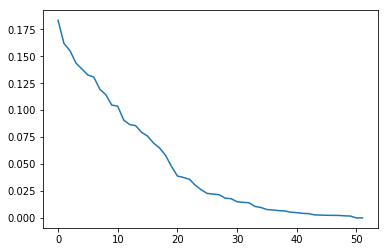

{'ground_truth_path': 'rated_datasets/Rotten Tomato_mcfelix_1519142949.904623.json'}


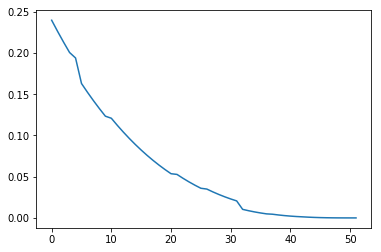

{'ground_truth_path': 'rated_datasets/Rotten Tomato_Constantin Lange_1519139724.4022887.json'}


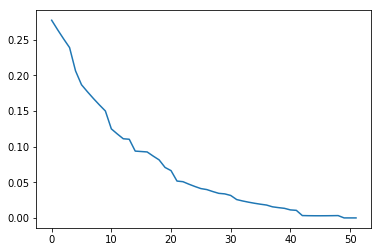

{'ground_truth_path': 'rated_datasets/Rotten Tomato_Potato_1519142479.127663.json'}


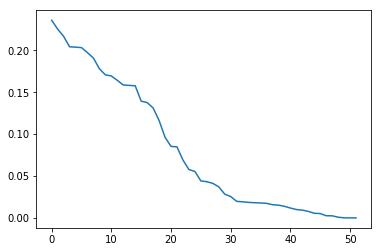

{'ground_truth_path': 'rated_datasets/Rotten Tomato_Juliane_1519146371.039609.json'}


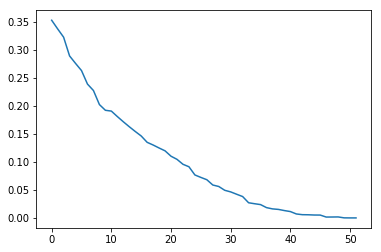

{'rating_func': <function constant at 0x000000F24F792D08>}


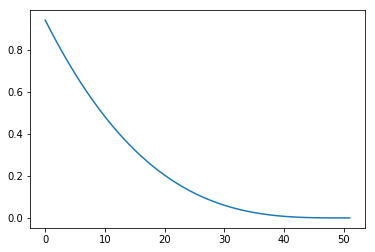

{'rating_func': <function entropy at 0x000000F24DD88BF8>}


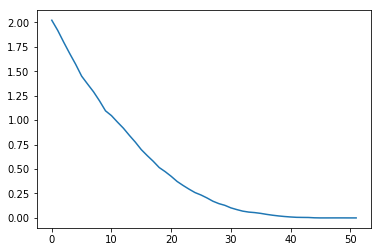

{'rating_func': <function length_based at 0x000000F24DD72E18>}


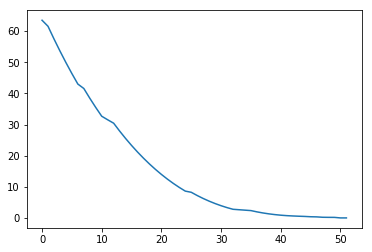

{'rating_func': <function randomly at 0x000000F24F746C80>}


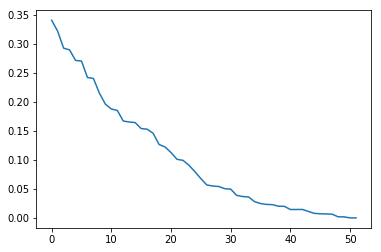

In [4]:
algorithm = RandomSelectionAlgorithm
algo_params = {}

for oracle, oracle_params in test_cases:
    evaluator = Evaluator(algorithm=algorithm, algo_params=algo_params,
                     oracle=oracle, oracle_params=oracle_params,
                     batch_size=1, dataset_name='Rotten Tomato')
    stats = evaluator.compute()
    print(oracle_params)
    stats['mse'].plot()
    plt.show()